DECISION TREES AND RANDOM FORESTS

decision tree accuracy: 0.8654970760233918
pruned tree accuracy: 0.8947368421052632


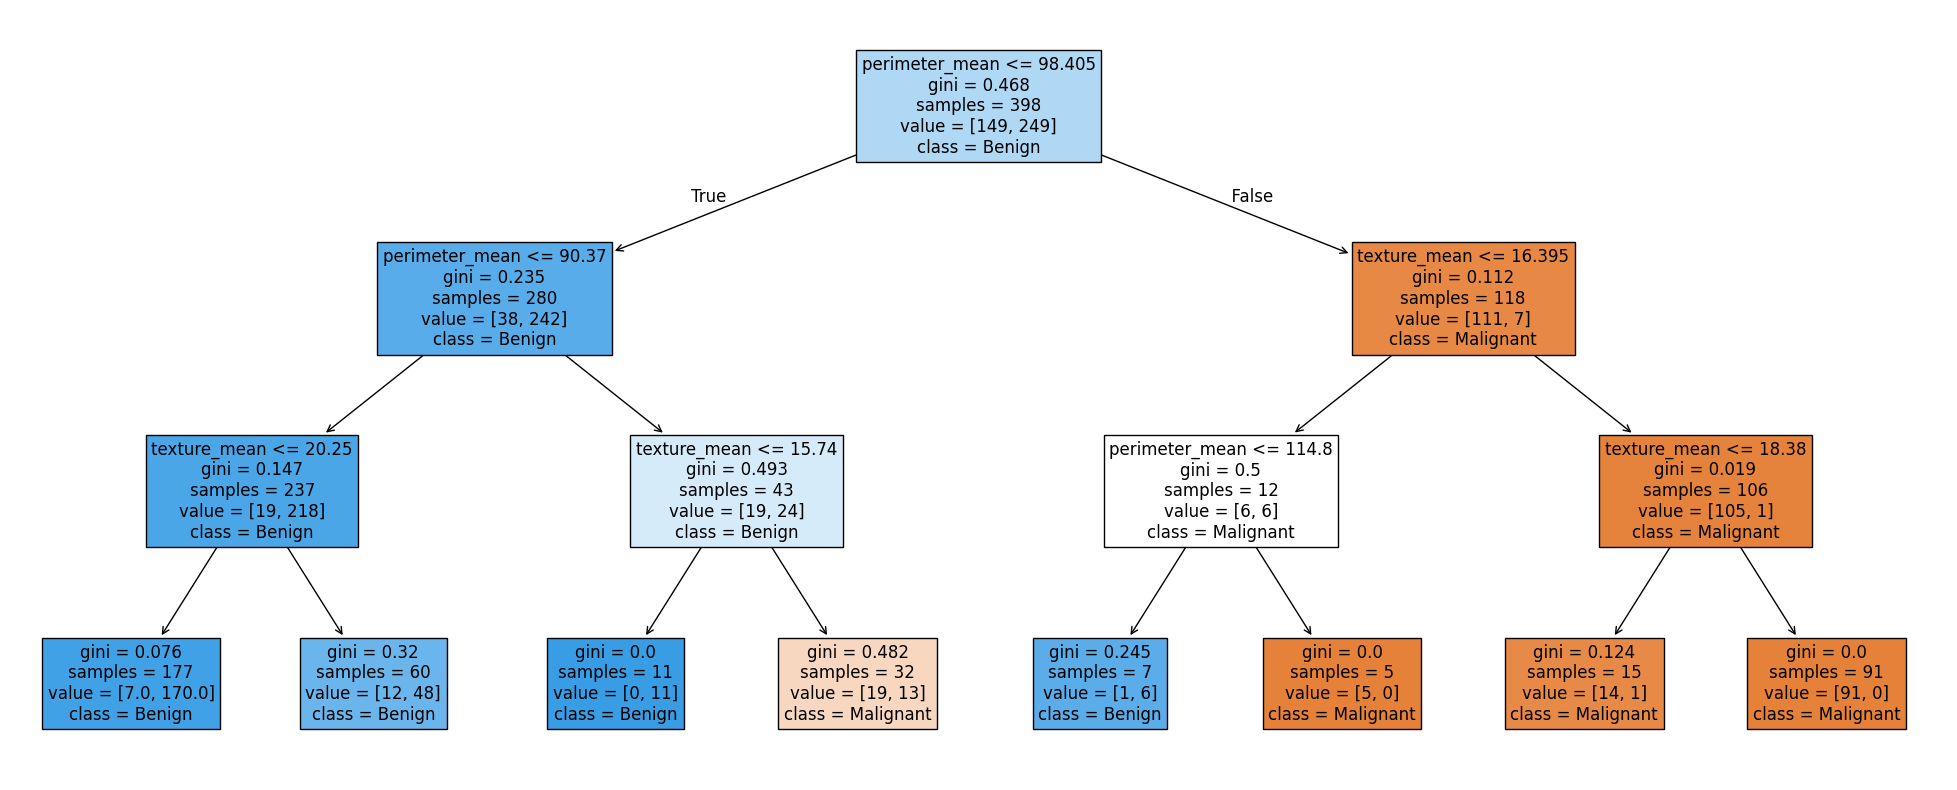

Random forest accuracy: 0.8830409356725146


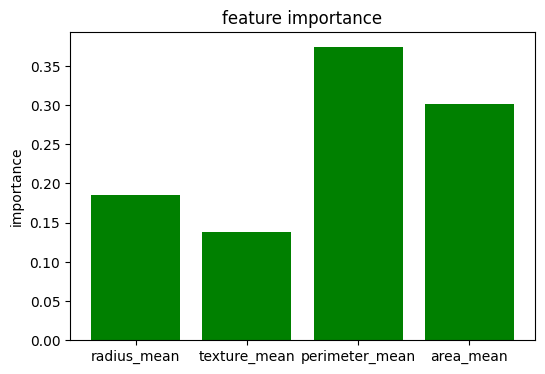

radius_mean:0.19
texture_mean:0.14
perimeter_mean:0.37
area_mean:0.30
cross validation accuracy-Tree:  0.8682
cross validation accuracy-Forest:  0.884


In [56]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#load dataset
df=pd.read_csv("cancer_dataset.csv")
df["target"]=df["diagnosis"].map({"M":0,"B":1})
X=df[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
y=df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
#decision tree classifier
tree=DecisionTreeClassifier().fit(X_train,y_train)
print("decision tree accuracy:",accuracy_score(y_test,tree.predict(X_test)))
#controling tree depth
pruned=DecisionTreeClassifier(max_depth=3,random_state=0).fit(X_train,y_train)
print("pruned tree accuracy:",accuracy_score(y_test,pruned.predict(X_test)))
plt.figure(figsize=(25,10))
plot_tree(pruned,feature_names=X.columns,class_names=["Malignant","Benign"],filled=True,fontsize=12)
plt.show()
#Random Forest
forest=RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train,y_train)
print("Random forest accuracy:",accuracy_score(y_test,forest.predict(X_test)))
#feature importance
imp=forest.feature_importances_
plt.figure(figsize=(6, 4))
plt.bar(X.columns,imp,color="green")
plt.title("feature importance")
plt.ylabel("importance")
plt.show()
# printing feature importance
for name,score in zip(X.columns,imp):
    print(f"{name}:{score:.2f}")
#cross validation
print("cross validation accuracy-Tree: ",round(cross_val_score(tree,X,y,cv=3).mean(),4))
print("cross validation accuracy-Forest: ",round(cross_val_score(forest,X,y,cv=3).mean(),4))